### import packages

In [40]:
import datascience as ds
from datascience import *
import numpy as np
from graphviz import Source
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import gensim
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.externals import joblib
import tensorflow as tf
import tensorflow_hub as hub
%matplotlib inline

### tweets data 

#### climate

In [3]:
df = pd.read_csv('Climate1SupportiveLevel.csv', sep=',')
df

,Unnamed: 0,ID,Text,SupportiveLabel
0,0,962_Cleand_Climate1.csv,RT @kasserolees: Energy is the #1 contributer ...,1
1,1,885_Cleand_Climate1.csv,RT @edelman_barbara: @msnbc why don t you have...,1
2,2,680_Cleand_Climate1.csv,RT @OtagoGrad: @anthonyfurey @OskieOckham The ...,0
3,3,1152_Cleand_Climate1.csv,The Dow just recorded its 3rd worst day ever. ...,0
4,4,731_Cleand_Climate1.csv,RT @SimonBanksHB: I am not going to rule out t...,0
5,5,1075_Cleand_Climate1.csv,RT @sydneyleemarco: nothing like an 80 degree ...,1
6,6,85_Cleand_Climate1.csv,@MerlenesMemos @CNN It's not an act of god. Cl...,1
7,7,654_Cleand_Climate1.csv,RT @MikeLevinCA: When asked about climate chan...,0
8,8,916_Cleand_Climate1.csv,RT @gq_jayq: Bet I got 11 years to run it up h...,0
9,9,372_Cleand_Climate1.csv,No they care about the oil billionaires,0


#### sentiment 140

In [66]:
df = pd.read_csv('/home/karen/Downloads/training.1600000.processed.noemoticon.csv', sep=',', encoding='latin-1')
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.target = df.target.replace(4,1)
df

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


### Preprocess

#### climate

In [ ]:
X = list(df['Text'])
y = list(df['SupportiveLabel'])

#### sentiment 140

In [67]:
X = df['text']
y = df['target']

### Check whether the data distribution is balanced

In [78]:
def check(sentiment, index, y_col, note='training'):
    if sentiment==0:
        label = 'negative'
    else:
        label = 'positive'
    df_partial = df.take(index)
    print('There are {} '.format(df_partial[df_partial[y_col]==sentiment].shape[0])+label+' tweets in the '+note+' set.')

### split

In [72]:
def custom_split(train_index, test_index, x_col, y_col):
    trainingset = df.take(train_index)
    testingset = df.take(test_index)    
        
    X_train= list(trainingset[x_col])
    y_train= list(trainingset[y_col])
    X_test= list(testingset[x_col])
    y_test= list(testingset[y_col])
    
    return X_train, X_test, y_train, y_test

### Models

In [70]:
class  TfIdfWord2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.tfidf_model = TfidfVectorizer(min_df=3, max_df=50000).fit(X)
        return self

    def transform(self, X):
        return self.tfidf_and_w2v(X, self.tfidf_model)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

    def tfidf_and_w2v(self, X, tfidf_model):
        tmp = tfidf_model.transform(X)
        a = tmp.toarray()
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        b = self.texts_encoder(X)
        return np.hstack((a, b))

### classifier

In [86]:
def classifier(X_train, y_train, X_test, fold, vect, clf):
    # token_pattern='(([#@]|[0-9]|[a-z]|[A-Z])+)'
    clf = Pipeline(
        [
            ('vect', vect),
            ('clf', clf)
        ])
    clf.fit(X_train, y_train)
    predicted_y_test = clf.predict(X_test)
    # save as pickle
    # joblib.dump(clf, 'ClimateTeam7PD1.pkl')
    return predicted_y_test

In [43]:
c=CountVectorizer(token_pattern="(?!RT|rt|\d+)[@#]*[\w\'_-]{2,100}",
                                     analyzer = 'word',
                                     stop_words='english',
                                     min_df = 3)
c.fit(X, y)
c.get_feature_names()

['#1o5c',
 '#actonclimate',
 '#auspol',
 '#cdnpoli',
 '#climate',
 '#climateaction',
 '#climatebreakdown',
 '#climatechange',
 '#climatechangeisreal',
 '#climateimpactsvic',
 '#dems',
 '#emissions',
 '#energy',
 '#environment',
 '#florida',
 '#forests',
 '#globalwarming',
 '#gop',
 '#hurricanemichael',
 '#hurricanemichael2018',
 '#ipcc',
 '#ipccreport',
 '#liberals',
 '#michael',
 '#nets',
 '#nswpol',
 '#onpoli',
 '#qldpol',
 '#science',
 '#solar',
 '#sr15',
 '#stopadani',
 '#sustainability',
 '#topoli',
 '#trump',
 '#weather',
 '#wentworthbyelection',
 '#wentworthvotes',
 "'climate",
 "'fabulous'",
 '--',
 '-year',
 '@algore',
 '@andrewgillum',
 '@atrupar',
 '@c40cities',
 '@carolinelucas',
 '@cathmckenna',
 '@chrisjzullo',
 '@chriskkenny',
 '@cnn',
 '@davesharma',
 '@david_leavitt',
 '@didikins4life',
 '@dtdchange',
 '@edwardjwhunter',
 '@elizabethforma',
 '@ericholthaus',
 '@esa_org',
 '@extinctsymbol',
 '@fema',
 '@fema_brock',
 '@flgovscott',
 '@fordnation',
 '@foxnews',
 '@gdilli

### evaluation

In [36]:
def eval_results(predicted_y_test, y_test):
    accuracy_s = accuracy_score(y_test, predicted_y_test)
    precision_s = precision_score(y_test, predicted_y_test)
    recall_s = recall_score(y_test, predicted_y_test)
    f1_s = f1_score(y_test, predicted_y_test)
    cm = confusion_matrix(y_test, predicted_y_test)  
    
    print('Accuracy Score:', accuracy_s)
    print("Precision Score:", precision_s)
    print("Recall Score:", recall_s)
    print("f1 Score:", f1_s)
    print('confusion_matrix is: \n', cm, '\n')
    print(classification_report(y_test, predicted_y_test))
    
    classes = ['not supportive', 'supportive']
    sns.heatmap(cm, annot=True, cmap='Blues', yticklabels=classes, xticklabels=classes)
    plt.show()
    return accuracy_s, precision_s, recall_s, f1_s, cm

### k-fold

In [87]:
def k_fold_evaluate(X, y, X_col, y_col, vect, clf):
    # initialization
    accuracy = []
    precision = []
    recall=[]
    f1 = []
    fold = 1
    skf = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
    
    # build model and collect results
    for train_index, test_index in skf.split(X, y):
        if fold==1:
            list(map(lambda x: check(x, train_index, y_col=y_col), range(2)))
            list(map(lambda x: check(x, test_index, note='testing', y_col=y_col), range(2)))
        
        X_train, X_test, y_train, y_test = custom_split(train_index, test_index, x_col=X_col, y_col=y_col)
        
        predicted_y_test = classifier(X_train=X_train, y_train=y_train, 
                                      X_test=X_test, fold=fold,
                                      vect = vect,
                                      clf = clf)
        
        print('\nFold: {}'.format(fold))
        accuracy_s, precision_s, recall_s, f1_s, cm = eval_results(predicted_y_test, y_test)
        
        accuracy.append(accuracy_s)
        precision.append(precision_s)
        recall.append(recall_s)
        f1.append(f1_s)
        
        metrics_df = pd.DataFrame(
                    {
                        'accuracy': accuracy,
                        'precision': precision,
                        'recall':recall,
                        'f1':f1
                    }
                )
        fold += 1
    return metrics_df

### test

There are 639999 negative tweets in the training set.
There are 640000 positive tweets in the training set.
There are 160000 negative tweets in the testing set.
There are 160000 positive tweets in the testing set.

Fold: 1
Accuracy Score: 0.64069375
Precision Score: 0.5915453436356243
Recall Score: 0.90913125
f1 Score: 0.7167331855136735
confusion_matrix is: 
 [[ 59561 100439]
 [ 14539 145461]] 

              precision    recall  f1-score   support

           0       0.80      0.37      0.51    160000
           1       0.59      0.91      0.72    160000

   micro avg       0.64      0.64      0.64    320000
   macro avg       0.70      0.64      0.61    320000
weighted avg       0.70      0.64      0.61    320000



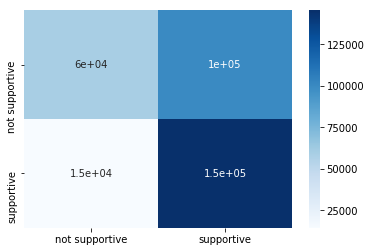


Fold: 2
Accuracy Score: 0.641065625
Precision Score: 0.5913404531713496
Recall Score: 0.9132625
f1 Score: 0.7178625556677304
confusion_matrix is: 
 [[ 59019 100981]
 [ 13878 146122]] 

              precision    recall  f1-score   support

           0       0.81      0.37      0.51    160000
           1       0.59      0.91      0.72    160000

   micro avg       0.64      0.64      0.64    320000
   macro avg       0.70      0.64      0.61    320000
weighted avg       0.70      0.64      0.61    320000



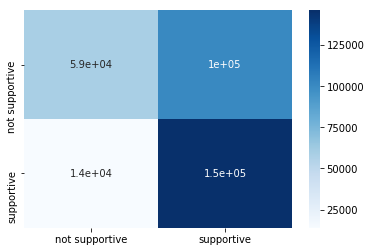


Fold: 3
Accuracy Score: 0.641721875
Precision Score: 0.591841198222755
Recall Score: 0.91328125
f1 Score: 0.718237203826994
confusion_matrix is: 
 [[ 59226 100774]
 [ 13875 146125]] 

              precision    recall  f1-score   support

           0       0.81      0.37      0.51    160000
           1       0.59      0.91      0.72    160000

   micro avg       0.64      0.64      0.64    320000
   macro avg       0.70      0.64      0.61    320000
weighted avg       0.70      0.64      0.61    320000



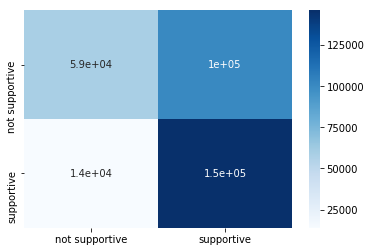


Fold: 4
Accuracy Score: 0.640325
Precision Score: 0.5908171602850879
Recall Score: 0.91289375
f1 Score: 0.7173630108392965
confusion_matrix is: 
 [[ 58841 101159]
 [ 13937 146063]] 

              precision    recall  f1-score   support

           0       0.81      0.37      0.51    160000
           1       0.59      0.91      0.72    160000

   micro avg       0.64      0.64      0.64    320000
   macro avg       0.70      0.64      0.61    320000
weighted avg       0.70      0.64      0.61    320000



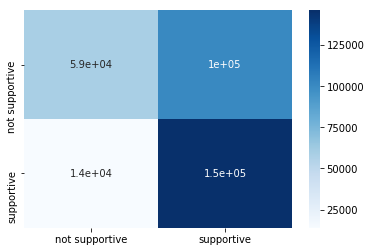


Fold: 5
Accuracy Score: 0.64198013118791
Precision Score: 0.5918177629398498
Recall Score: 0.91515
f1 Score: 0.7187970958288129
confusion_matrix is: 
 [[ 59009 100990]
 [ 13576 146424]] 

              precision    recall  f1-score   support

           0       0.81      0.37      0.51    159999
           1       0.59      0.92      0.72    160000

   micro avg       0.64      0.64      0.64    319999
   macro avg       0.70      0.64      0.61    319999
weighted avg       0.70      0.64      0.61    319999



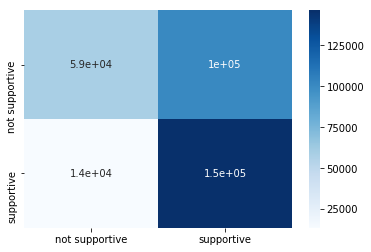

,accuracy,precision,recall,f1
0,0.640694,0.591545,0.909131,0.716733
1,0.641066,0.591340,0.913262,0.717863
2,0.641722,0.591841,0.913281,0.718237
3,0.640325,0.590817,0.912894,0.717363
4,0.641980,0.591818,0.915150,0.718797


In [88]:
vect = CountVectorizer(token_pattern="(?!RT|rt|\d+)[@#]*[\w\'_-]{2,100}",
                                     analyzer = 'word',
                                     stop_words='english',
                                     min_df = 3)
vect = TfIdfWord2VecVectorizer()
clf = DecisionTreeClassifier(criterion='entropy',
                                           random_state = 100,
                                           max_depth = 35,
                                           min_samples_leaf = 3)
k_fold_evaluate(X, y, X_col='text', y_col='target', vect=vect, clf=clf)

### reload pickle

In [39]:
clf2 = joblib.load('ClimateTeam7PD1.pkl')
y_pred = clf2.predict(X)
f1_score(y, y_pred)

0.7355096602265155